In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
pip install 

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [4]:
student_data = pd.read_csv('data/student_marks.csv')

**Exploratory Data Analysis**

In [5]:
student_data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
# shape of data
student_data.shape #100 records 3 features

(100, 3)

In [7]:
student_data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


Number of courses :  Mean - 5.29, 50th Percentile - 5, Min - 3, Max - 8

Time spent studying : Mean - 4.077, 50th Percentile - 4.022, Min - 2.37, Max - 7.95

Marks : Mean - 24.417, 50th Percentile - 20.059, Min - 5.609, Max - 55.299

<AxesSubplot:xlabel='time_study', ylabel='Marks'>

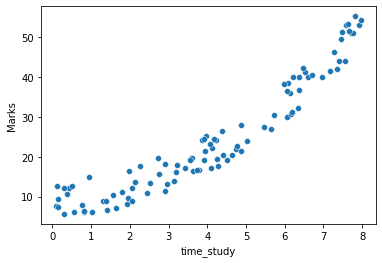

In [8]:
sns.scatterplot(x="time_study", y="Marks", data=student_data)

*From the graph above - Time of study is directly proportional to marks*

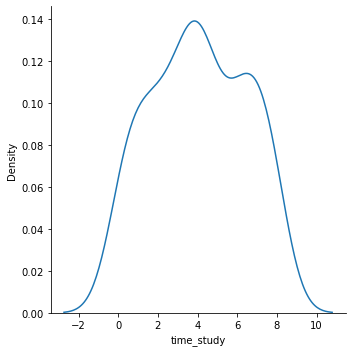

In [9]:
# Visualizing using lineplot
sns.displot(x="time_study", kind = "kde", data=student_data)

*From the graph above - Most time spent studying is between 2 to 6 hours, with the average being 5*

<AxesSubplot:xlabel='number_courses', ylabel='time_study'>

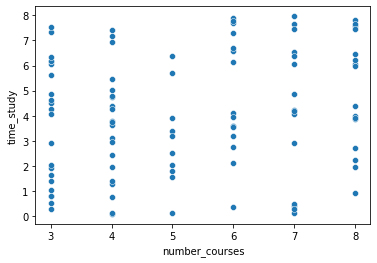

In [10]:
sns.scatterplot(x="number_courses", y="time_study", data=student_data)

<AxesSubplot:xlabel='number_courses', ylabel='Marks'>

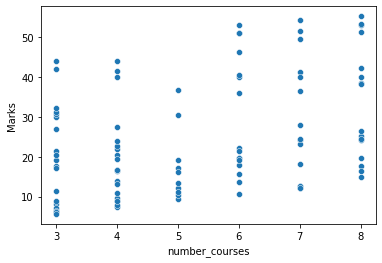

In [11]:
sns.scatterplot(x="number_courses", y="Marks", data=student_data)

*Taking more courses(6,7,8), resulted into studying for more hours, and having higher marks on average*

*The opposite for taking lesser courses, lesser study hours, and lesser marks*

*The students who took 5 courses studied for lesser hours on average and had the worst performance on average*

### Model Building

In [12]:
# splitting data
X = student_data.drop(columns=["Marks"])
y = student_data["Marks"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# fitting data
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_true = y_test

In [14]:
# testing model - mse
mean_squared_error(y_true, y_pred)

14.200726136374538

In [15]:
# testing model - Rsqured
r2_score(y_true, y_pred)

0.9459936100591214

**The R Squared and Mean Squared Error shows our model is fairly accurate**

In [17]:
# serializing model
import joblib
filename = 'student_prediction_model.sav' 
joblib.dump(model, filename)

['student_prediction_model.sav']